In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
ds = pd.read_csv("DS3.csv")

In [3]:
ds.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
ds.dropna(inplace=True)
ds

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
ds["labels"] = ds["class"].map({0:"Hate Speech", 1:"Offensive Language", 2: "No Hate Speech/Offensive Language"})

In [6]:
ds

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate Speech/Offensive Language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate Speech/Offensive Language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [7]:
data = ds[["tweet","labels"]]

In [8]:
data.tail(20)

,tweet,labels
24763,you gotta be a new breed of retarded if you do...,Offensive Language
24764,you gotta understand that these bitches are ch...,Offensive Language
24765,you hoe spice,Offensive Language
24766,you just want some attention hoe,Offensive Language
24767,"you know what they say, the early bird gets th...",No Hate Speech/Offensive Language
24768,you know what your doing when you favorite a t...,Offensive Language
24769,"you lil dumb ass bitch, i ain't fuckin wit chu...",Offensive Language
24770,you look like AC Green...bitch don't call here...,Offensive Language
24771,you look like your 12 stop talking about fucki...,Offensive Language
24772,you might as well gone pussy pop on a stage,Offensive Language


In [9]:
import string
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stemmer = nltk.SnowballStemmer("english")
stopwords.add('rt')

In [10]:
#Preprocessing/Cleaning of Data

def clean_data(cleandata):
    cleandata = str(cleandata).lower()
    cleandata = re.sub('https?://\S+|www\.S+','', cleandata)
    cleandata = re.sub('\[.*?\]','', cleandata)
    cleandata = re.sub('<.*?>+', '', cleandata)
    cleandata = re.sub('[%s]' %re.escape(string.punctuation), '', cleandata)
    cleandata = re.sub('\n', '', cleandata)
    cleandata = re.sub('\w*\d\w*', '', cleandata)
    cleandata = [word for word in cleandata.split(' ') if word not in stopwords]
    cleandata = " ".join(cleandata)
    cleandata = [stemmer.stem(word) for word in cleandata.split(' ')]
    cleandata = " ".join(cleandata)
    return cleandata

In [11]:
data['tweet'] = data['tweet'].apply(clean_data)

C:\Users\kshit\AppData\Local\Temp\ipykernel_1552\3370867953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_data)


In [12]:
data.iloc[12000:12030]

,tweet,labels
12000,cool know yall got wrong bitch understand,Offensive Language
12001,crazi hoe ken folk im talk friend famili,Offensive Language
12002,feel like wintertim bitch,Offensive Language
12003,funni bitch nag jus mad cant,Offensive Language
12004,funni hoe text yo phone day day later boyfriend,Offensive Language
12005,gorg anggxo bitch think june someth briiixo,Offensive Language
12006,hotter fast bitch thigh rub togeth run marathon,Offensive Language
12007,like u want sidelin hoe dat shid aint nvr finn...,Offensive Language
12008,alway good hater sometim your stupid bitch,Offensive Language
12009,nt hate bitch hate shot,Offensive Language


In [13]:
X = np.array(data['tweet'])
y = np.array(data['labels'])

In [14]:
X

array([' mayasolov woman shouldnt complain clean hous amp man alway take trash',
       '  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' urkindofbrand dawg  ever fuck bitch start cri confus shit', ...,
       'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [16]:
cvct = CountVectorizer()
X = cvct.fit_transform(X)

In [17]:
X

<24783x25692 sparse matrix of type '<class 'numpy.int64'>'
	with 190738 stored elements in Compressed Sparse Row format>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [19]:
X_train

<14869x25692 sparse matrix of type '<class 'numpy.int64'>'
	with 114487 stored elements in Compressed Sparse Row format>

In [20]:
#Building ML Model

from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dt.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[ 214,   57,  301],
       [  39, 1409,  230],
       [ 309,  288, 7067]], dtype=int64)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

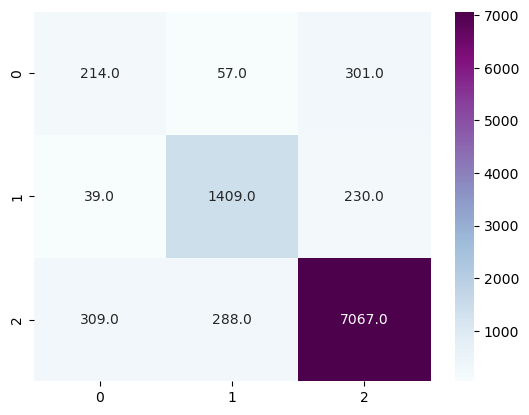

In [25]:
sns.heatmap(cfm, annot = True, fmt=".1f", cmap="BuPu")

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8765382287673996

In [27]:
sample = "Honor killing is the only punishment for you."
sample = clean_data(sample)

In [28]:
sample

'honor kill punish'

In [29]:
datax = cvct.transform([sample]).toarray()

In [30]:
dt.predict(datax)

array(['Offensive Language'], dtype=object)